### Daten laden



In [1]:
import pandas as pd
import time
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
"""
try:
  df_target= pd.read_csv('/content/drive/MyDrive/project/lucas_organic_carbon_target.csv')
  df = pd.read_csv('/content/drive/MyDrive/project/lucas_organic_carbon_training_and_test_data.csv')
except:
  # Ben-Ergänzung
  # Ordner in Google-Drive
  # alt: df=pd.read_csv('drive/MyDrive/Lucas-Organic-Carbon/training_test/lucas_organic_carbon_training_and_test_data.csv')
  df=pd.read_csv('drive/MyDrive/Lucas-Organic-Carbon/training_test/filtered_data.csv')
  df_target=pd.read_csv('drive/MyDrive/Lucas-Organic-Carbon/target/lucas_organic_carbon_target.csv')
"""

FileNotFoundError: ignored

In [3]:
#Frank Pfad
try:
  df_target= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/V_A_r_z_D/lucas_organic_carbon_data/lucas_organic_carbon/target/lucas_organic_carbon_target.csv')
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/V_A_r_z_D/lucas_organic_carbon_data/lucas_organic_carbon/training_test/lucas_organic_carbon_training_and_test_data.csv')
except:
  # Ben-Ergänzung
  # Ordner in Google-Drive
  # alt: df=pd.read_csv('drive/MyDrive/Lucas-Organic-Carbon/training_test/lucas_organic_carbon_training_and_test_data.csv')
  df=pd.read_csv('drive/MyDrive/Lucas-Organic-Carbon/training_test/filtered_data.csv')
  df_target=pd.read_csv('drive/MyDrive/Lucas-Organic-Carbon/target/lucas_organic_carbon_target.csv')

### Bibs und Split

In [ ]:
# Bibliotheken

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
try:
  from pySankey.sankey import sankey
except:
  !pip install pySankey
  !pip install pySankey.sankey

  from pySankey.sankey import sankey

try:
  import catboost
except:
  !pip install catboost
  import catboost
  from catboost import CatBoostClassifier


!pip install shap[GPU]
import shap

ERROR: Could not find a version that satisfies the requirement pySankey.sankey (from versions: none)
ERROR: No matching distribution found for pySankey.sankey
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install dash

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px


# Modelle

### XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap
import pandas as pd

# Annahme: df und df_target sind bereits definiert

# Label Encoding für das Ziel (df_target)
le = LabelEncoder()
df_target_encoded = le.fit_transform(df_target.values.ravel())

# Standardisierung der Features
sc_x = StandardScaler()
X_standardized = pd.DataFrame(sc_x.fit_transform(df), columns=df.columns)

# Aufteilen der Daten in Trainings- und Testsets
data_train, data_test, target_train, target_test = train_test_split(X_standardized, df_target_encoded, test_size=0.25, random_state=42)

# XGBoost-Parameter
params = {'device': 'cuda',
    'tree_method': 'hist',
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 5,
    'eval_metric': 'mlogloss'
}

# Erstellen des DMatrix-Objekts für das Training
dtrain = xgb.DMatrix(data_train, label=target_train)

# Modelltraining
bst = xgb.train(params, dtrain)



In [ ]:
array = np.array([0, 1, 2, 3, 4])
category_mapping=le.inverse_transform(array)
classnames=le.inverse_transform(array)
category_mapping_sankey={0:'high', 1:'low', 2:'moderate', 3:'very high', 4:'very low'}
le.classes_


array(['high', 'low', 'moderate', 'very_high', 'very_low'], dtype=object)

[20:52:49] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


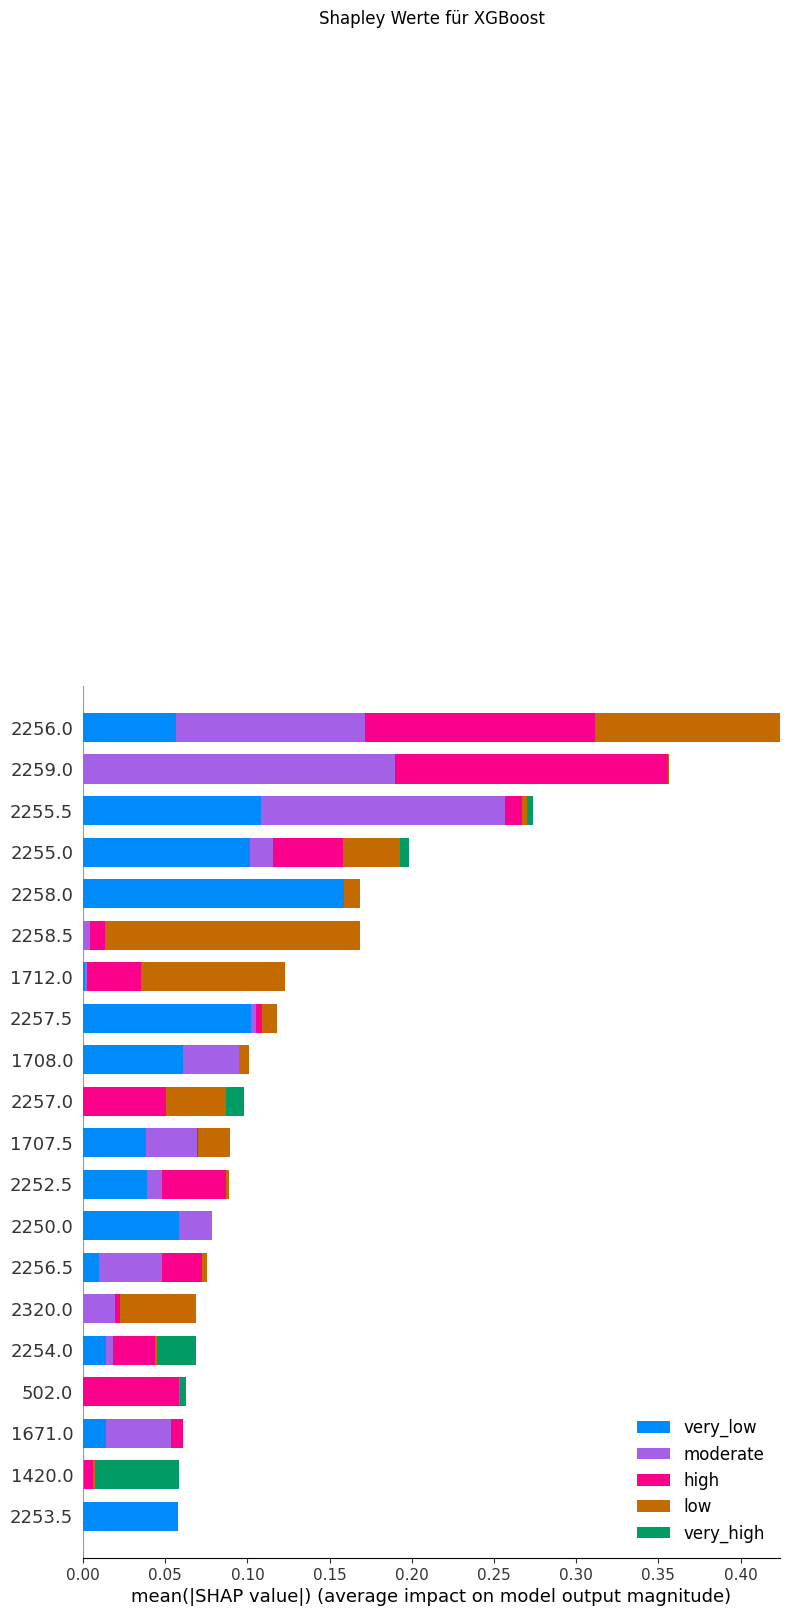

'\ninstance = data_test.iloc[0]\n\n# Berechne die Shapley-Werte für diese Instanz\nshap_values_single = explainer.shap_values(instance)\n\n# Plote die Shapley-Werte für diese Instanz\nshap.force_plot(explainer.expected_value, shap_values_single, instance)'

In [ ]:

# Erstelle eine SHAP explainer Instanz mit dem trainierten XGBoost-Modell
explainer = shap.TreeExplainer(bst)

# Erstelle eine SHAP-Wert-Summenplot
shap_values = explainer.shap_values(data_train)

# Plote die SHAP-Wert-Summenplot
xgboostplot= shap.summary_plot(shap_values, data_train, plot_type="bar",class_names=classnames, show=0)
plt.title("Shapley Werte für XGBoost", y=1.75)
plt.show()
# Wähle eine bestimmte Instanz aus dem Testdatensatz
'''
instance = data_test.iloc[0]

# Berechne die Shapley-Werte für diese Instanz
shap_values_single = explainer.shap_values(instance)

# Plote die Shapley-Werte für diese Instanz
shap.force_plot(explainer.expected_value, shap_values_single, instance)'''

In [ ]:
#Accuracy
dtest = xgb.DMatrix(data_test)
xgboost_pred=bst.predict(dtest)
accuracy_score(target_test, xgboost_pred)

0.7736459175424414

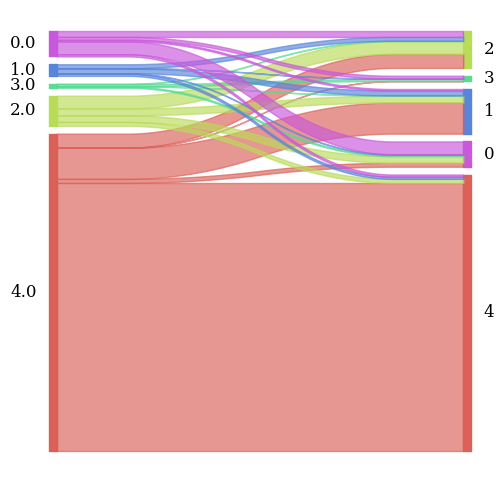

In [ ]:
sankey_fig_xgboost = sankey(xgboost_pred, target_test, aspect=20, fontsize=12)

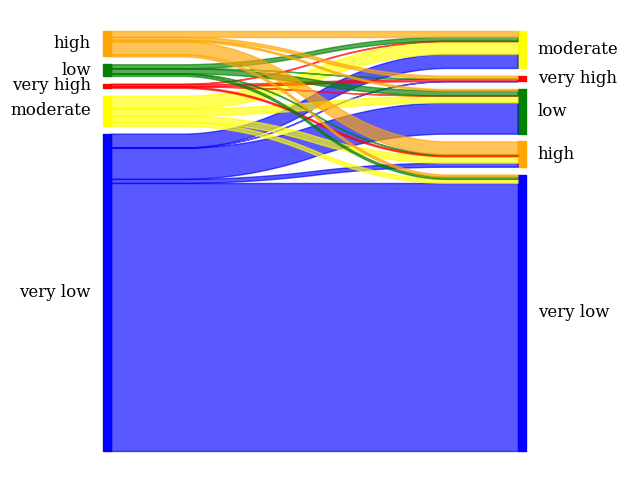

In [ ]:

sankey_data = pd.DataFrame({
    'Predicted': [category_mapping_sankey[val] for val in xgboost_pred],
    'Actual': [category_mapping_sankey[val] for val in target_test]
})

colors = {
    'very low': 'blue',
    'low': 'green',
    'moderate': 'yellow',
    'high': 'orange',
    'very high': 'red'
}

# Plotting the Sankey diagram
sankey(
    left=sankey_data['Predicted'],
    right=sankey_data['Actual'],
    aspect=20,
    colorDict=colors,
    fontsize=12
)

Funktioniert bei mir nicht... ;(


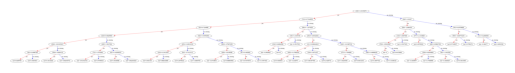

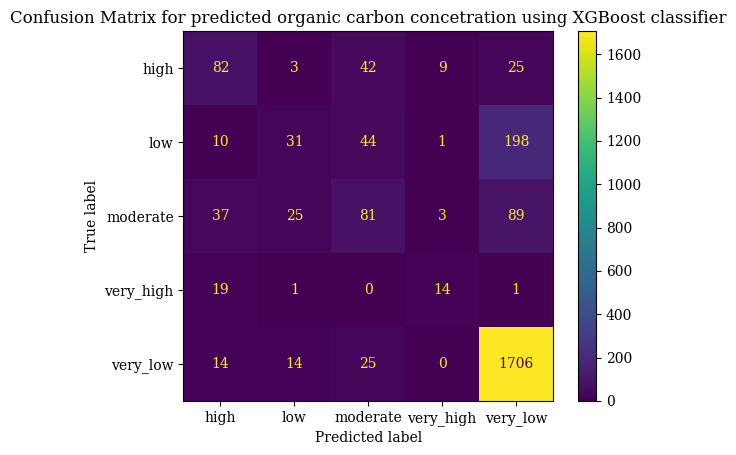

In [ ]:
# Get a graph
graph = xgb.to_graphviz(bst, num_trees=1)
# Or get a matplotlib axis
ax = xgb.plot_tree(bst, num_trees=1)
# Get feature importances
try:
  bst.feature_importances_
except:
  print("Funktioniert bei mir nicht... ;(")


unique_classes = np.unique(target_train)
cm = confusion_matrix(target_test, xgboost_pred, labels=unique_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_mapping)
disp.plot()
plt.title('Confusion Matrix for predicted organic carbon concetration using XGBoost classifier')
plt.show()

### LightGBM

In [ ]:

d_train=lgb.Dataset(data_train, label=target_train)
#setting up the parameters
params={}
params['learning_rate']=0.19
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=3
params['num_leaves'] = 12
params['num_class']=5 #no.of unique values in the target class not inclusive of the end value
#training the model
clf=lgb.train(params,d_train,100)  #training the model on 100 epocs
#prediction on the test dataset
y_pred_1=clf.predict(data_test)
#argmax() method
lightbgm_pred = [np.argmax(line) for line in y_pred_1]
lightbgm_pred

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.816747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020000
[LightGBM] [Info] Number of data points in the train set: 7421, number of used features: 4000
[LightGBM] [Info] Start training from score -2.805046
[LightGBM] [Info] Start training from score -2.171550
[LightGBM] [Info] Start training from score -2.260497
[LightGBM] [Info] Start training from score -4.277340
[LightGBM] [Info] Start training from score -0.346276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[4,
 2,
 2,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 1,
 1,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 0,
 4,
 4,
 2,
 2,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 1,
 4,
 2,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 1,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 1,
 0,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 1,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 3,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 4,
 2,
 4,
 1,
 2,
 2,
 4,
 4,
 4,
 0,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [ ]:
#using precision score for error metrics
precision_score(lightbgm_pred,target_test,average=None).mean()
accuracy_score(target_test, lightbgm_pred)

0.7776879547291835

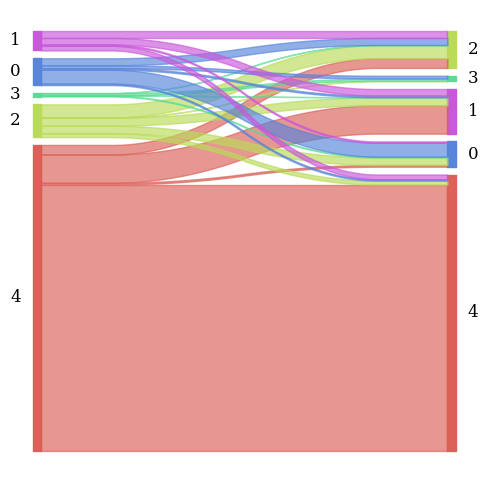

In [ ]:
sankey_fig_lightgbm = sankey(lightbgm_pred, target_test, aspect=20, fontsize=12)

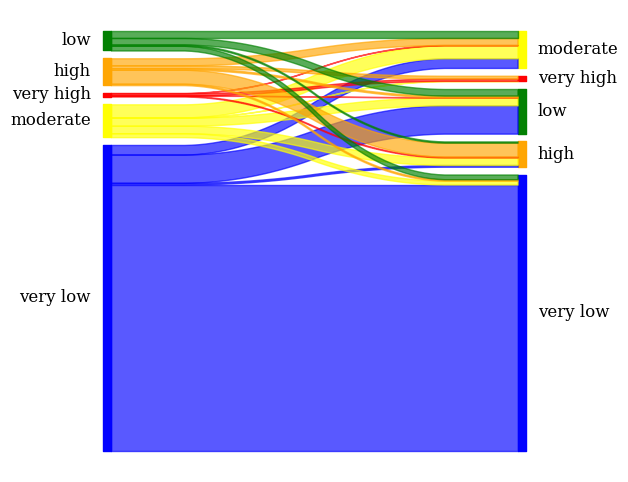

In [ ]:

sankey_data = pd.DataFrame({
    'Predicted': [category_mapping_sankey[val] for val in lightbgm_pred],
    'Actual': [category_mapping_sankey[val] for val in target_test]
})

colors = {
    'very low': 'blue',
    'low': 'green',
    'moderate': 'yellow',
    'high': 'orange',
    'very high': 'red'
}

# Plotting the Sankey diagram
sankey(
    left=sankey_data['Predicted'],
    right=sankey_data['Actual'],
    aspect=20,
    colorDict=colors,
    fontsize=12
)


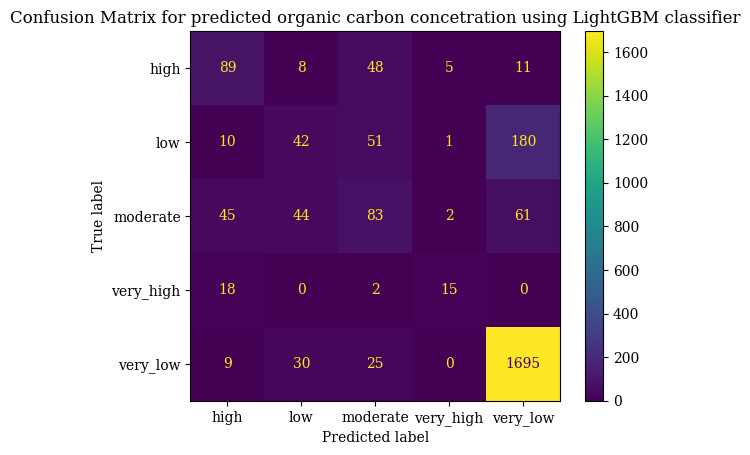

In [ ]:

cm = confusion_matrix(target_test, lightbgm_pred, labels=unique_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_mapping)
disp.plot()
plt.title('Confusion Matrix for predicted organic carbon concetration using LightGBM classifier')
plt.show()

###CatBoost


In [ ]:
%%capture
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

# Initialize the CatBoost Classifier
cat_model = CatBoostClassifier(iterations=100, depth=3, learning_rate=0.19, loss_function='MultiClass', verbose=True,   task_type="GPU",
                           devices='0:1')

# Fit the model
# Assuming your data_train is the feature set and target_train is the target variable
cat_model.fit(data_train, target_train)

0:	learn: 1.2474675	total: 133ms	remaining: 13.2s
1:	learn: 1.0856421	total: 177ms	remaining: 8.67s
2:	learn: 0.9816659	total: 224ms	remaining: 7.23s
3:	learn: 0.9105587	total: 264ms	remaining: 6.33s
4:	learn: 0.8581979	total: 296ms	remaining: 5.63s
5:	learn: 0.8194471	total: 332ms	remaining: 5.2s
6:	learn: 0.7885786	total: 362ms	remaining: 4.82s
7:	learn: 0.7641056	total: 405ms	remaining: 4.65s
8:	learn: 0.7428432	total: 442ms	remaining: 4.47s
9:	learn: 0.7255195	total: 463ms	remaining: 4.17s
10:	learn: 0.7111465	total: 487ms	remaining: 3.94s
11:	learn: 0.6979651	total: 518ms	remaining: 3.8s
12:	learn: 0.6870172	total: 552ms	remaining: 3.69s
13:	learn: 0.6787634	total: 574ms	remaining: 3.52s
14:	learn: 0.6706808	total: 593ms	remaining: 3.36s
15:	learn: 0.6641729	total: 612ms	remaining: 3.21s
16:	learn: 0.6576058	total: 641ms	remaining: 3.13s
17:	learn: 0.6506866	total: 665ms	remaining: 3.03s
18:	learn: 0.6461717	total: 689ms	remaining: 2.94s
19:	learn: 0.6424221	total: 718ms	remaining

In [ ]:
# Make predictions
y_pred_cat = cat_model.predict(data_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy_cat = accuracy_score(target_test, y_pred_cat)
print(f"Accuracy of CatBoost Model: {accuracy_cat:.2f}")


Accuracy of CatBoost Model: 0.77


In [ ]:
y_pred_cat_2 = []
for i in y_pred_cat:
  y_pred_cat_2.append(i[0])

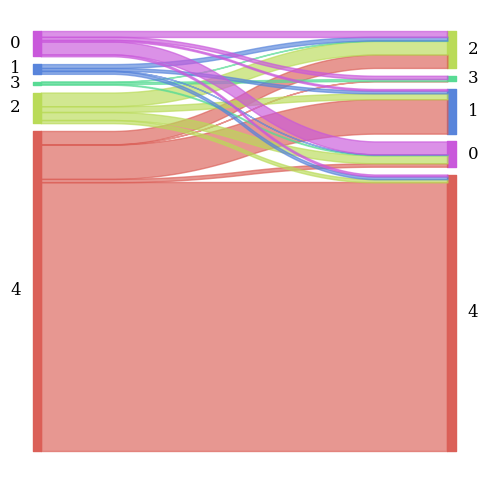

In [ ]:
sankey_fig_catboost = sankey(y_pred_cat_2, target_test, aspect=20, fontsize=12)

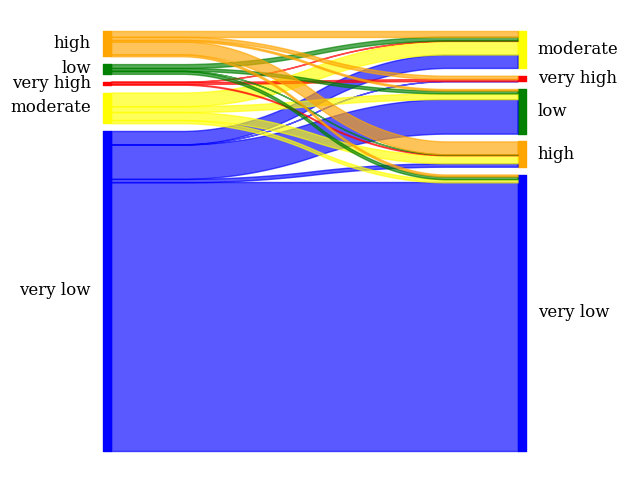

In [ ]:

sankey_data = pd.DataFrame({
    'Predicted': [category_mapping_sankey[val] for val in y_pred_cat_2],
    'Actual': [category_mapping_sankey[val] for val in target_test]
})

colors = {
    'very low': 'blue',
    'low': 'green',
    'moderate': 'yellow',
    'high': 'orange',
    'very high': 'red'
}

# Plotting the Sankey diagram
sankey(
    left=sankey_data['Predicted'],
    right=sankey_data['Actual'],
    aspect=20,
    colorDict=colors,
    fontsize=12
)


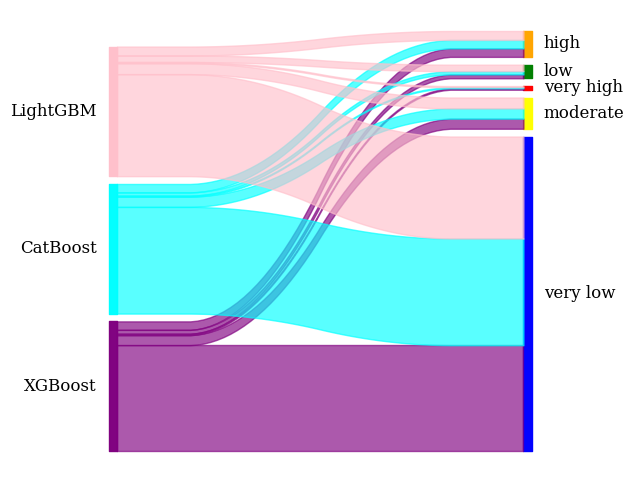

In [ ]:
# comparison
category_mapping_sankey.update({
    'XGBoost': 'XGBoost',
    'LightGBM': 'LightGBM',
    'CatBoost': 'CatBoost'
})

# Determine the shortest length among the arrays
#min_length = min(len(y_pred_12), len(y_pred_cat_2), len(target_test), len(y_test))

# Truncate all arrays to the shortest length
#y_pred_12_truncated = y_pred_12[:min_length]
#y_pred_cat_2_truncated = y_pred_cat_2[:min_length]
#target_test_truncated = target_test[:min_length]
#y_test_truncated = y_test[:min_length]

# Now, you can proceed to create the combined DataFrame for the Sankey diagram
combined_sankey_data = pd.concat([
    pd.DataFrame({'Model': 'XGBoost', 'Predicted': [category_mapping_sankey[val] for val in xgboost_pred], 'Actual': [category_mapping_sankey[val] for val in target_test]}),
    pd.DataFrame({'Model': 'CatBoost', 'Predicted': [category_mapping_sankey[val] for val in y_pred_cat_2], 'Actual': [category_mapping_sankey[val] for val in target_test]}),
    pd.DataFrame({'Model': 'LightGBM', 'Predicted': [category_mapping_sankey[val] for val in lightbgm_pred], 'Actual': [category_mapping_sankey[val] for val in target_test ]}),
])

# Colors for models and categories
colors.update({
    'XGBoost': 'purple',
    'LightGBM': 'pink',
    'CatBoost': 'cyan'
})

# Plotting the Summary Sankey Diagram
sankey(
    left=combined_sankey_data['Model'],
    right=combined_sankey_data['Predicted'],
    aspect=20,
    colorDict=colors,
    fontsize=12
)

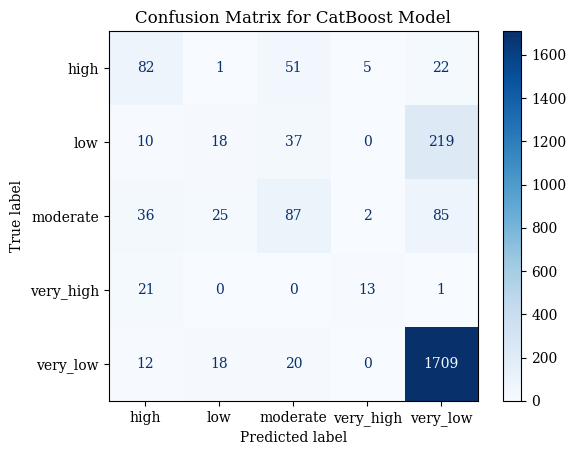

In [ ]:

cm_cat = confusion_matrix(target_test, y_pred_cat)


disp = ConfusionMatrixDisplay(confusion_matrix=cm_cat, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for CatBoost Model")
plt.show()

# Comparsion


In [ ]:
xgb_pred = bst.predict(dtest)
catboost_pred = cat_model.predict(data_test)
lgbm_pred = clf.predict(data_test)
catboost_pred_2 = []
for i in catboost_pred:
  catboost_pred_2.append(i[0])
lgbm_pred_2=[np.argmax(line) for line in lgbm_pred]
predictions_df = pd.DataFrame({
    'XGBoost': xgb_pred,
    'CatBoost': catboost_pred_2,
    'LightGBM': lgbm_pred_2,
    'Actual': target_test
})
predictions_df.astype('int32').dtypes

XGBoost     int32
CatBoost    int32
LightGBM    int32
Actual      int32
dtype: object

In [ ]:

predictions_df=predictions_df.replace({"XGBoost":category_mapping_sankey,
                "CatBoost": category_mapping_sankey,
"LightGBM":    category_mapping_sankey,
"Actual": category_mapping_sankey})

In [ ]:
predictions_df

,XGBoost,CatBoost,LightGBM,Actual
0,very low,very low,very low,very low
1,moderate,moderate,moderate,high
2,moderate,moderate,moderate,low
3,very low,very low,very low,low
4,very high,very high,very high,very high
...,...,...,...,...
2469,very low,very low,very low,very low
2470,very low,very low,very low,very low
2471,very low,very low,very low,very low
2472,low,moderate,moderate,low


In [ ]:
import plotly.graph_objects as go

def create_sankey_plotly(df, model_name):

    transition_counts = df.groupby([model_name, 'Actual']).size().reset_index(name='count')


    labels = list(set(transition_counts[model_name]).union(set(transition_counts['Actual'])))
    label_map = {label: i for i, label in enumerate(labels)}

    sources = transition_counts[model_name].map(label_map).tolist()
    targets = transition_counts['Actual'].map(label_map).tolist()
    weights = transition_counts['count'].tolist()
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
        ),
        link=dict(
            source=sources,
            target=targets,
            value=weights
        ))])

    fig.update_layout(title_text=f"Sankey Diagram for {model_name}", font_size=10)
    return fig

fig_xgboost = create_sankey_plotly(predictions_df, 'XGBoost')
fig_catboost = create_sankey_plotly(predictions_df, 'CatBoost')
fig_lightgbm = create_sankey_plotly(predictions_df, 'LightGBM')

fig_xgboost.show()
fig_catboost.show()
fig_lightgbm.show()


In [ ]:
predictions_df.to_csv('preds.csv', index=False)

In [ ]:

def calculate_metrics(df, actual_col, model_col):
    unique_classes = df[actual_col].unique()
    metrics = {}

    for cls in unique_classes:

        TP = df[(df[model_col] == cls) & (df[actual_col] == cls)].shape[0]

        FP = df[(df[model_col] == cls) & (df[actual_col] != cls)].shape[0]

        FN = df[(df[model_col] != cls) & (df[actual_col] == cls)].shape[0]

        TN = df[(df[model_col] != cls) & (df[actual_col] != cls)].shape[0]


        precision = TP / (TP + FP) if (TP + FP) > 0 else 0

        accuracy = (TP + TN) / (TP + FP + FN + TN)

        recall = TP / (TP + FN) if (TP + FN) > 0 else 0

        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        metrics[cls] = {
            "TP": TP, "FP": FP, "FN": FN, "TN": TN,
            "Precision": precision, "Accuracy": accuracy,
            "Recall": recall, "F1 Score": f1_score
        }

    return metrics


model_metrics = {}
for model in ['XGBoost', 'CatBoost', 'LightGBM']:
    model_metrics[model] = calculate_metrics(predictions_df, 'Actual', model)

model_metrics



{'XGBoost': {'very low': {'TP': 1706,
   'FP': 313,
   'FN': 53,
   'TN': 402,
   'Precision': 0.8449727587914809,
   'Accuracy': 0.8520614389652384,
   'Recall': 0.9698692438885731,
   'F1 Score': 0.9031233456855479},
  'high': {'TP': 82,
   'FP': 80,
   'FN': 79,
   'TN': 2233,
   'Precision': 0.5061728395061729,
   'Accuracy': 0.9357316087308003,
   'Recall': 0.5093167701863354,
   'F1 Score': 0.5077399380804953},
  'low': {'TP': 31,
   'FP': 43,
   'FN': 253,
   'TN': 2147,
   'Precision': 0.4189189189189189,
   'Accuracy': 0.8803556992724333,
   'Recall': 0.10915492957746478,
   'F1 Score': 0.17318435754189943},
  'very high': {'TP': 14,
   'FP': 13,
   'FN': 21,
   'TN': 2426,
   'Precision': 0.5185185185185185,
   'Accuracy': 0.9862570735650767,
   'Recall': 0.4,
   'F1 Score': 0.45161290322580644},
  'moderate': {'TP': 81,
   'FP': 111,
   'FN': 154,
   'TN': 2128,
   'Precision': 0.421875,
   'Accuracy': 0.8928860145513339,
   'Recall': 0.3446808510638298,
   'F1 Score': 0.379

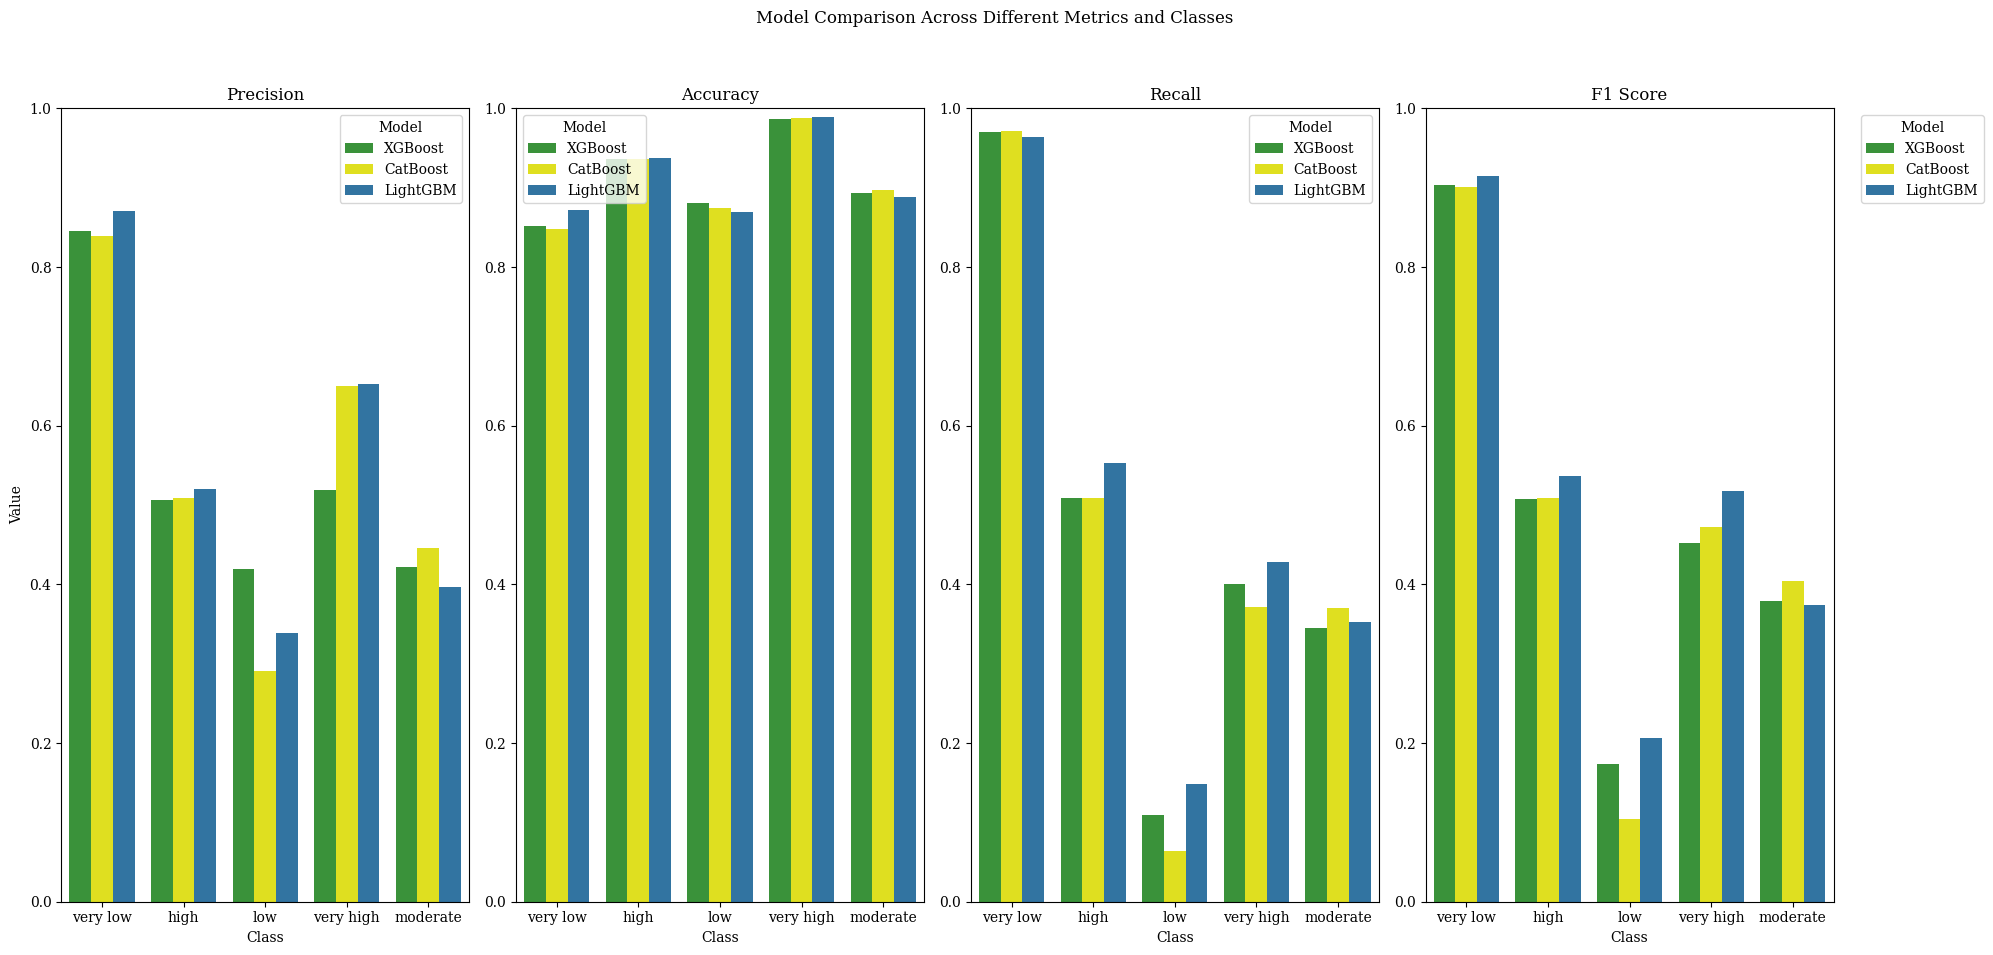

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


metrics = ['Precision', 'Accuracy', 'Recall', 'F1 Score']
classes = ['very low', 'high', 'low', 'very high', 'moderate']
models = ['XGBoost', 'CatBoost', 'LightGBM']

plot_data = []
for metric in metrics:
    for cls in classes:
        for model in models:
            value = model_metrics[model][cls][metric]
            plot_data.append([metric, cls, model, value])

df_plot = pd.DataFrame(plot_data, columns=['Metric', 'Class', 'Model', 'Value'])
custom_palette = {"XGBoost": "tab:green", "CatBoost": "yellow", "LightGBM": "tab:blue"}

plt.figure(figsize=(20, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, len(metrics), i)
    sns.barplot(x='Class', y='Value', hue='Model', data=df_plot[df_plot['Metric'] == metric], palette= custom_palette)
    plt.title(metric)
    plt.ylim(0, 1)
    if i > 1:
        plt.ylabel('')
    else:
        plt.ylabel('Value')

plt.suptitle('Model Comparison Across Different Metrics and Classes')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



# Dashboard


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go


app = dash.Dash(__name__)

# Unique model names
model_names = ["CatBoost", "XGBoost", "LightGBM"]

# Dash layout
app.layout = html.Div([
    html.H1("AI Model Exploration Dashboard"),
    dcc.Dropdown(
        id='model-dropdown',
        options=[{'label': model, 'value': model} for model in model_names],
        value=model_names[0],
        style={'width': '50%'}
    ),
    dcc.Dropdown(
        id='visualization-dropdown',
        options=[
            {'label': 'Sankey Diagram', 'value': 'Sankey'},
            {'label': 'Shapley Values', 'value': 'Shapley'},
            {'label': 'Metrics (Accuracy, Precision, Recall, F1-score)', 'value': 'Metrics'}
        ],
        value='Sankey',
        style={'width': '50%'}
    ),
    dcc.Graph(id='visualization-output')
])

# Callback to update visualization based on user input
@app.callback(
    Output('visualization-output', 'figure'),
    [Input('model-dropdown', 'value'),
     Input('visualization-dropdown', 'value')]
)
def update_visualization(selected_model, selected_visualization):
    if selected_visualization == 'Sankey':
        if selected_model == 'XGBoost':
            # Assuming xgboost_pred and target_test are available
            sankey_fig = sankey_fig_xgboost
        elif selected_model == 'CatBoost':
            # Assuming catboost_pred and target_test are available
            sankey_fig = sankey_fig_xgcatboost
        else: #if selected_model == 'LightGBM':
            # Assuming lightgbm_pred and target_test are available
            sankey_fig = sankey_fig_lightgbm

        sankey_fig.update_layout(title_text=f'Sankey Diagram for {selected_model}')
        return sankey_fig

    elif selected_visualization == 'Shapley':
        # Filter data for the selected model
        model_data = shapley_values_data[shapley_values_data['Model'] == selected_model]

        # Add your Shapley values plot generation code here
        # For example, create a bar chart of Shapley values
        fig = go.Figure()
        fig.add_trace(go.Bar(x=model_data['Feature'], y=model_data['Shapley Value']))
        fig.update_layout(title_text=f'Shapley Values for {selected_model}', xaxis_title='Feature', yaxis_title='Shapley Value')
        return fig

    elif selected_visualization == 'Metrics':
        # Filter data for the selected model
        model_data = metrics_data[metrics_data['Model'] == selected_model]

        # Add your metrics visualization code here
        # For example, create a bar chart of accuracy, precision, recall, and f1-score
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
        fig = go.Figure()
        for metric in metrics:
            fig.add_trace(go.Bar(x=[metric], y=model_data[metric]))

        fig.update_layout(title_text=f'Metrics for {selected_model}', xaxis_title='Metric', yaxis_title='Value')
        return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
from dash import Dash, html, dash_table, dcc
import pandas as pd
import plotly.express as px

# App
app = Dash(__name__)
app.layout = html.Div([
    html.Div(children='My First App with Data'),
    dash_table.DataTable(data=predictions_df.to_dict('records'), page_size=10),
    dcc.Graph(figure=px.histogram(predictions_df, x='XGBoost', y='CatBoost', histfunc='avg'))
])
# Run the app
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
import json, urllib

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Supply chain of the energy production'),
    dcc.Graph(id="graph"),
    html.P("Opacity"),
    dcc.Slider(id='slider', min=0, max=1,
               value=0.5, step=0.1)
])

@app.callback(
    Output("graph", "figure"),
    Input("slider", "value"))
def display_sankey(opacity):
    data = predictions_df

    node = data['data'][0]['node']
    node['color'] = [
        f'rgba(255,0,255,{opacity})'
        if c == "magenta" else c.replace('0.8', str(opacity))
        for c in node['color']]

    link = data['data'][0]['link']
    link['color'] = [
        node['color'][src] for src in link['source']]

    fig = go.Figure(go.Sankey(link=link, node=node))
    fig.update_layout(font_size=10)
    return fig

app.run_server(debug=True)

<IPython.core.display.Javascript object>